In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Admin/Downloads/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2> Since we want to know the reason behind the customer leaving the company so we will analysis those who left </h2>

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<h2> First of all create a separate variable for those who left the company </h2>

In [9]:
left_data=df[df['Churn']=='Yes']

In [10]:
left_data.shape

(1869, 21)

<h3>Since we do not need the customer id as it is unique and it will not be useful for us </h3>

In [11]:
df.drop('customerID',axis=1,inplace=True)

In [12]:
left_data['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [13]:
cat_cols=left_data.select_dtypes(include=['object'])

In [14]:
cat_cols.shape

(1869, 18)

In [15]:
cat_cols.drop("customerID",axis=1,inplace=True)

IndexError: index 16 is out of bounds for axis 0 with size 16

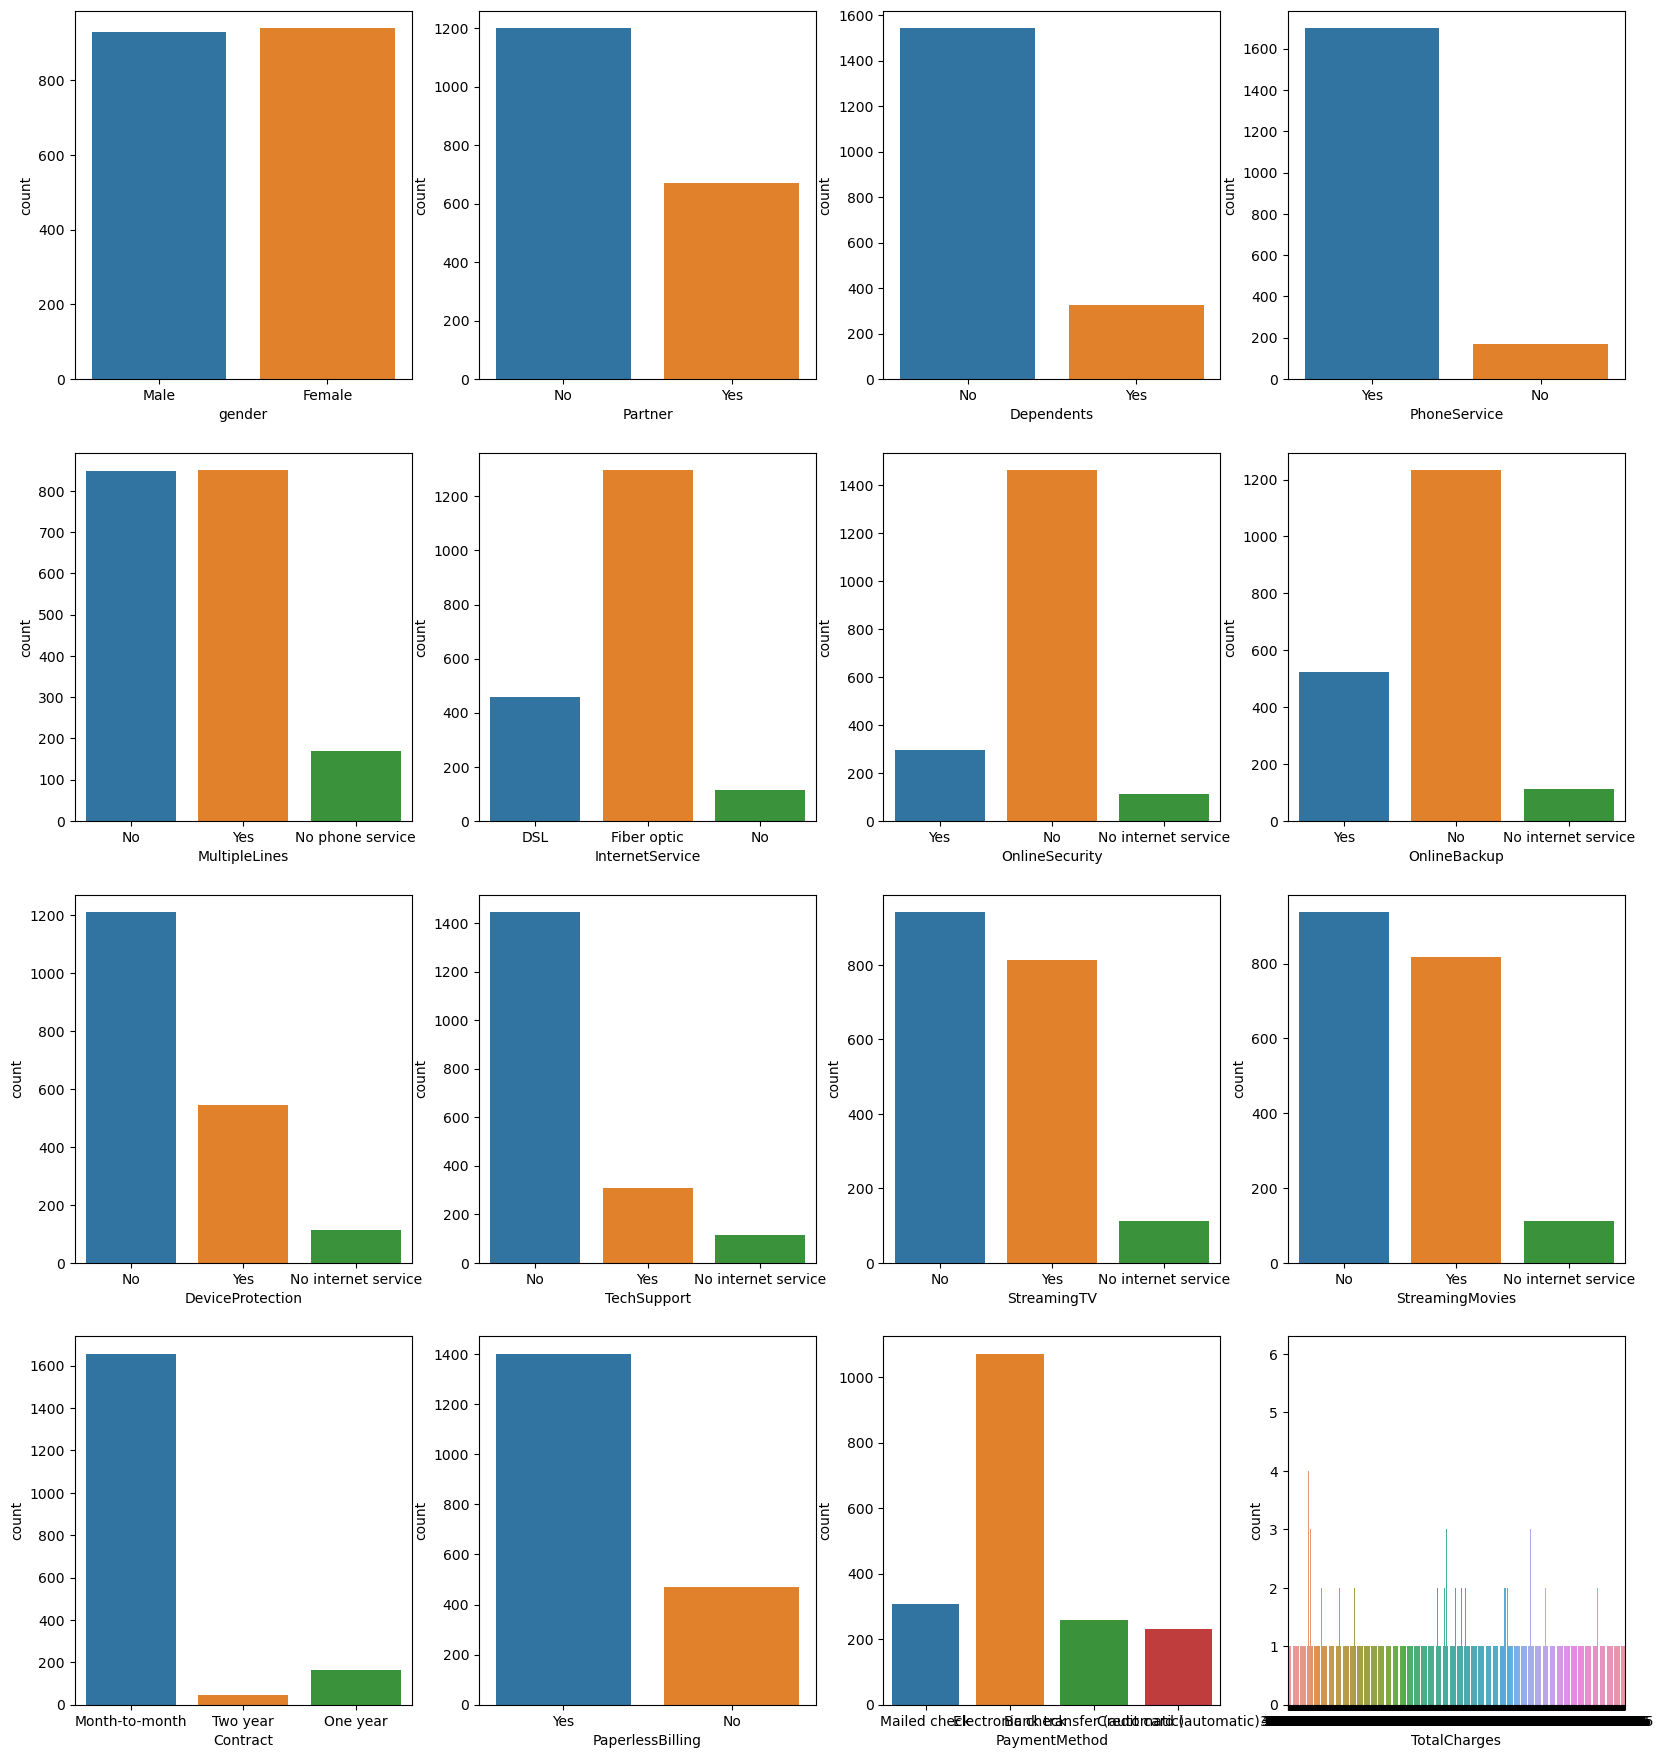

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=left_data[col], ax=axes[i])
plt.tight_layout()

plt.show()

In [18]:
"""The number of males and females is almost equal.
Most customers have a partner and dependents.
Most customers have phone service, multiple lines, and internet service.
Most customers do not have online security, online backup, device protection, or tech support.
Most customers have streaming TV and streaming movies.
Most customers have a month-to-month contract.
Most customers have paperless billing.
Most customers pay with electronic check.
The monthly charges range from 20 to 120.
The total charges range from 200 to 8000."""

'The number of males and females is almost equal.\nMost customers have a partner and dependents.\nMost customers have phone service, multiple lines, and internet service.\nMost customers do not have online security, online backup, device protection, or tech support.\nMost customers have streaming TV and streaming movies.\nMost customers have a month-to-month contract.\nMost customers have paperless billing.\nMost customers pay with electronic check.\nThe monthly charges range from 20 to 120.\nThe total charges range from 200 to 8000.'

<h3> This means that the people who left due to privacy and security reasons.We will also check some more factors </h3>

In [19]:
numeric_data=left_data.select_dtypes(include=["float","int"])

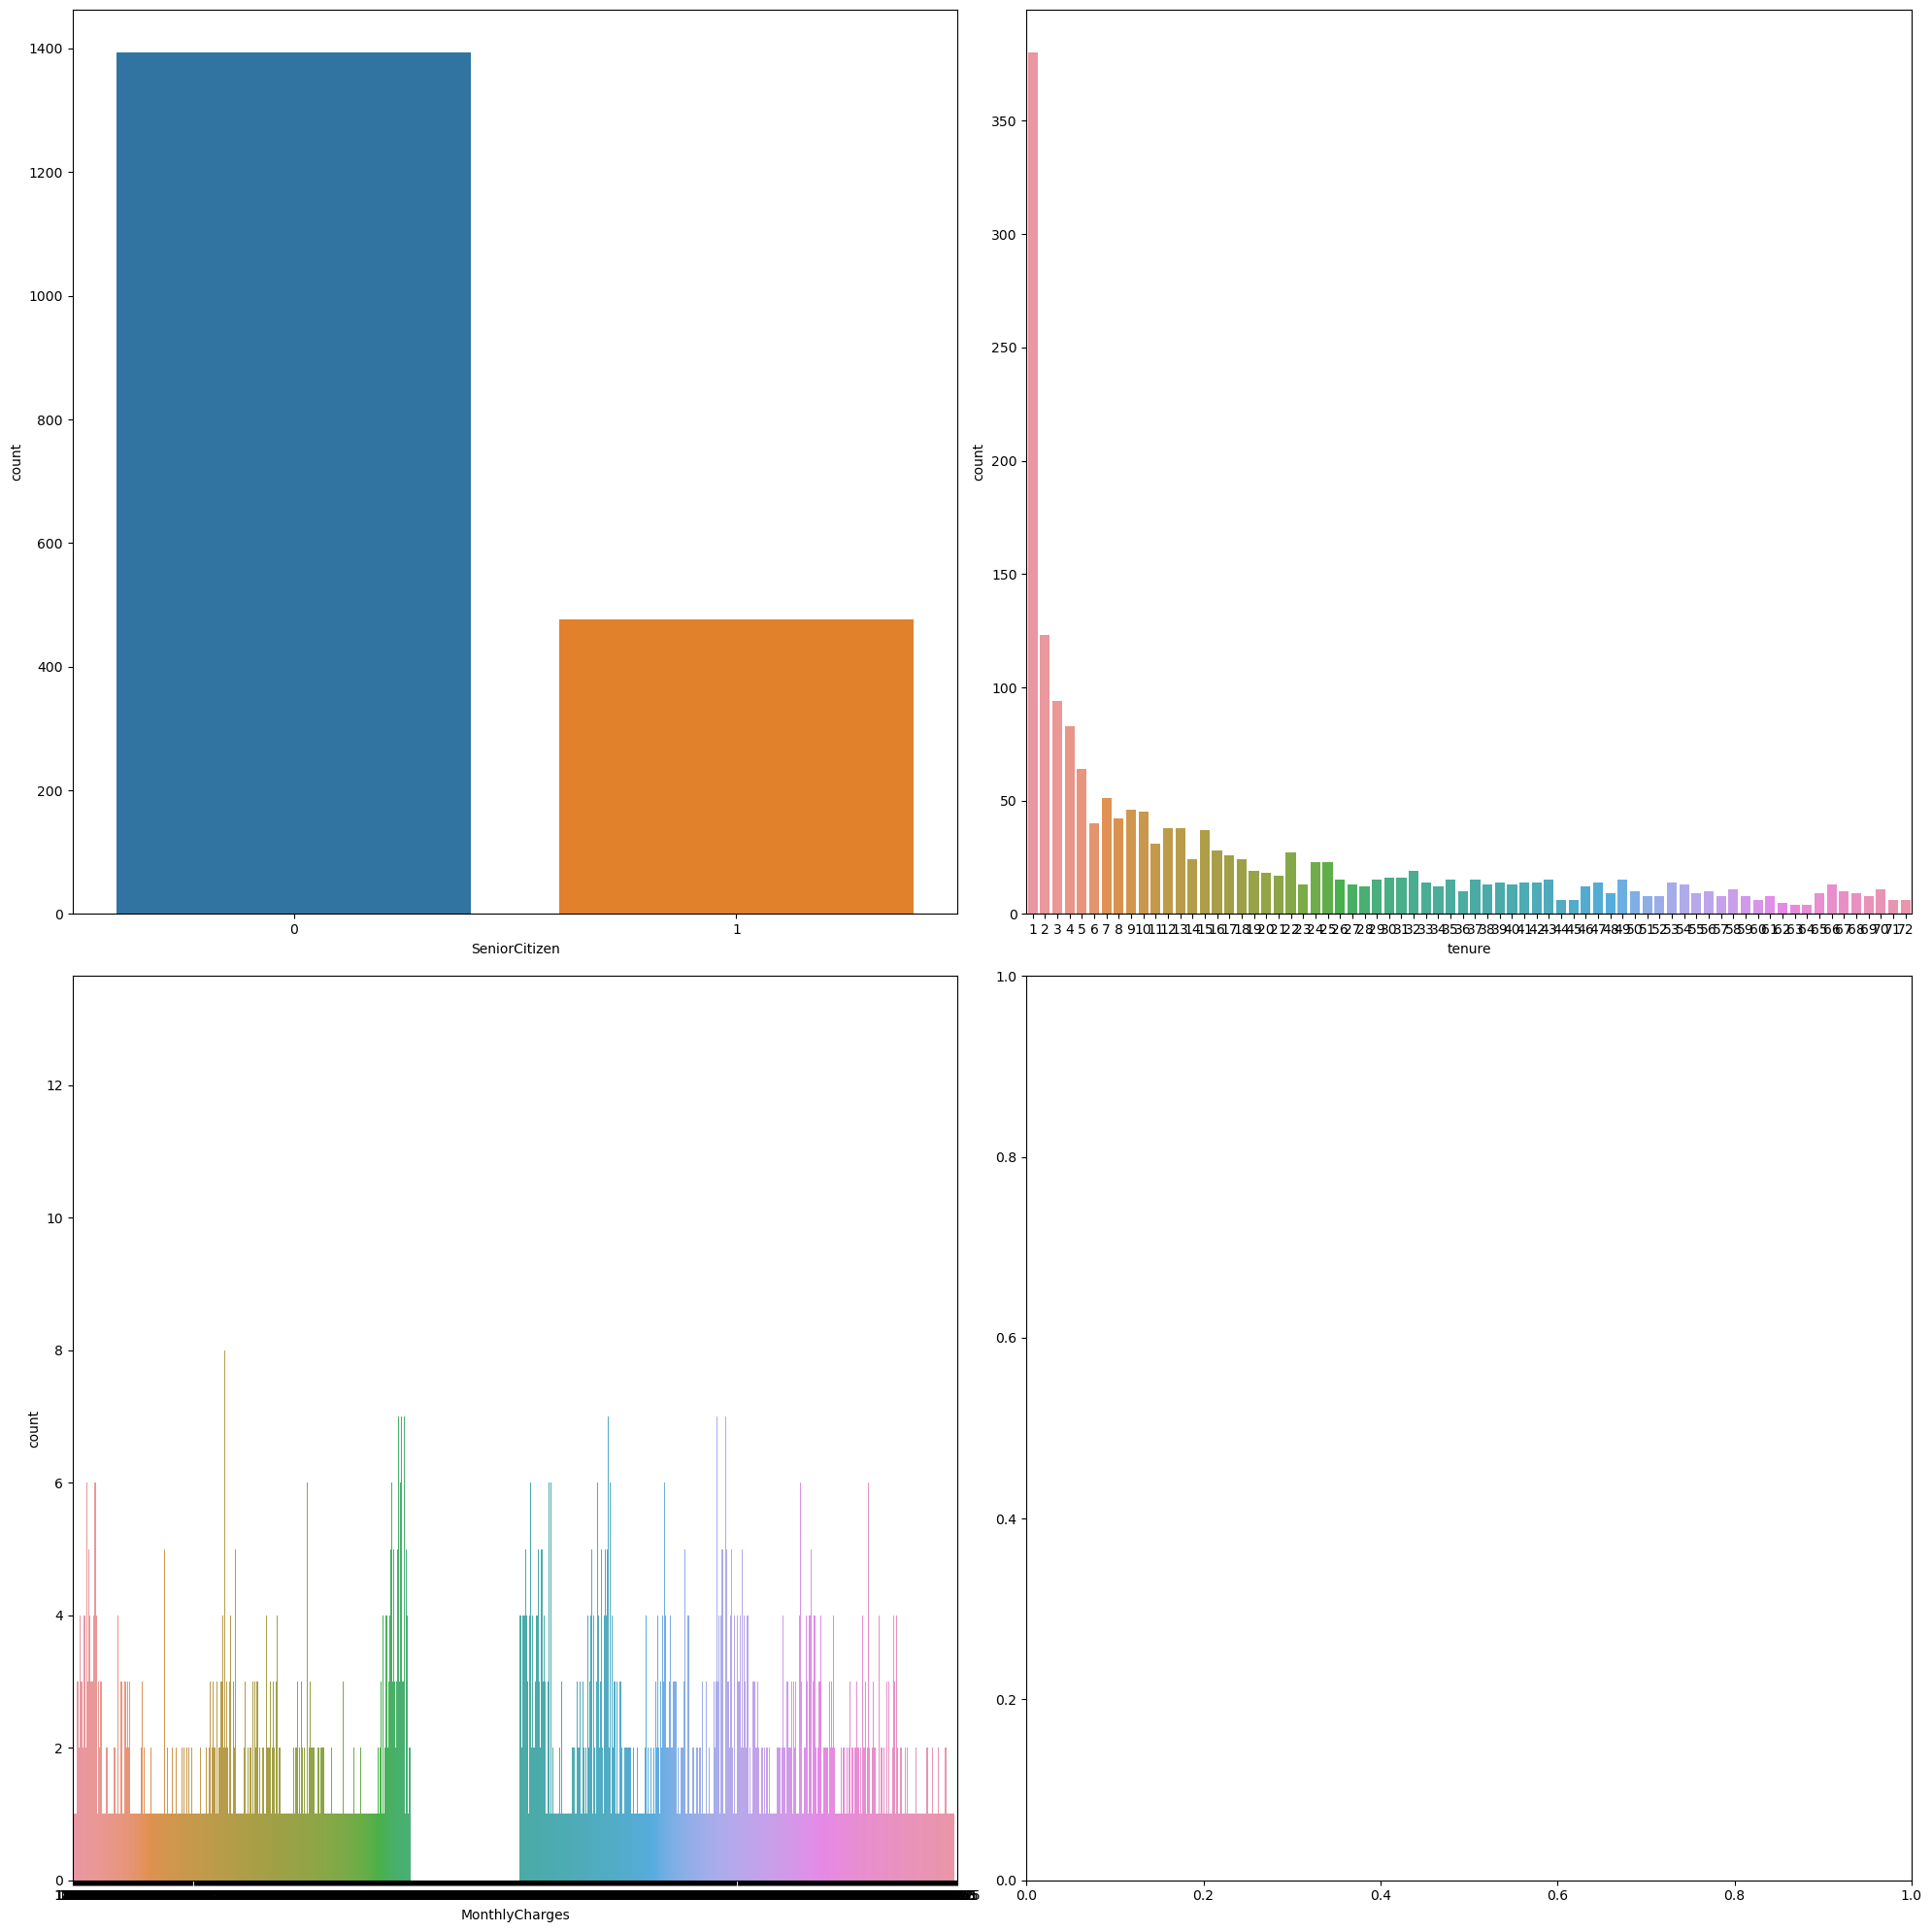

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_data):
    sns.countplot(x=left_data[col], ax=axes[i])
plt.tight_layout()

plt.show()

In [21]:
"""Most of the persons who left are adult.
   Whenever the ratio of tenure increases, the churn retention increases.
"""

'Most of the persons who left are adult.\n   Whenever the ratio of tenure increases, the churn retention increases.\n'

<h2> Since we have seen the data now lets move towards remove the outliers and do some feature Engineering </h2>

In [22]:
num_cols=df.select_dtypes(include=['float','int'])

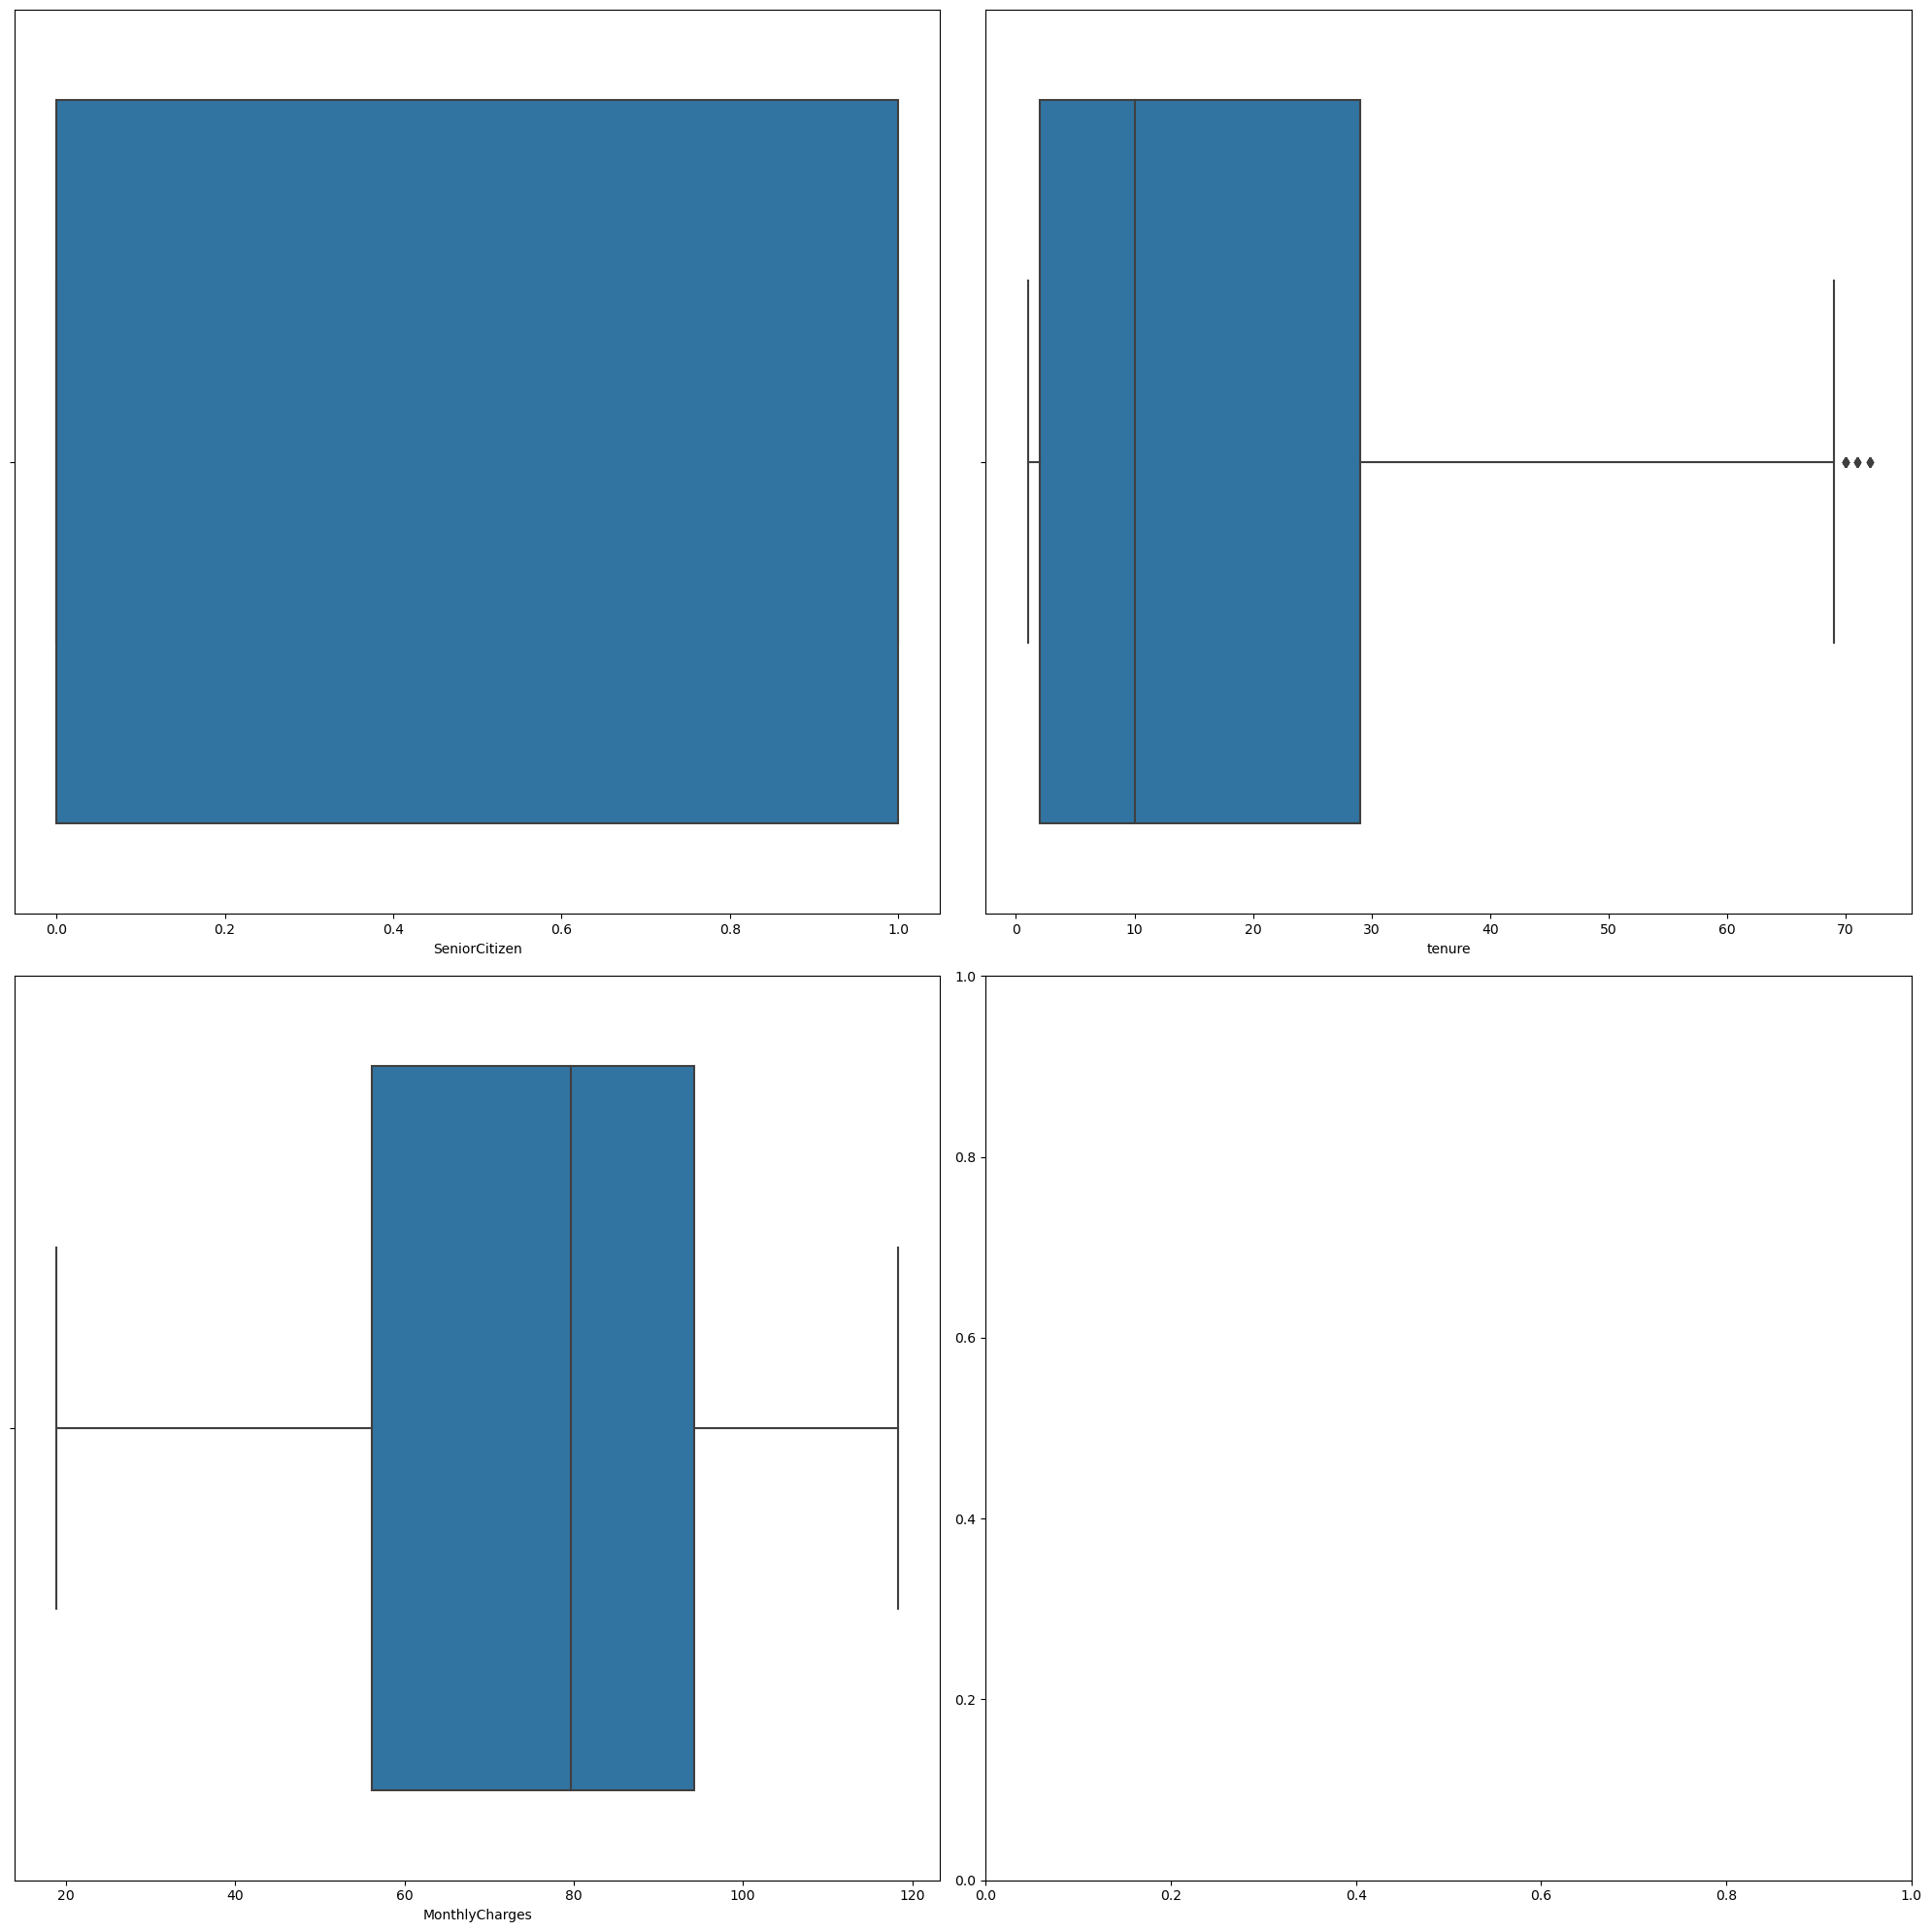

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_data):
    sns.boxplot(x=left_data[col], ax=axes[i])
plt.tight_layout()

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6236\4274940075.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

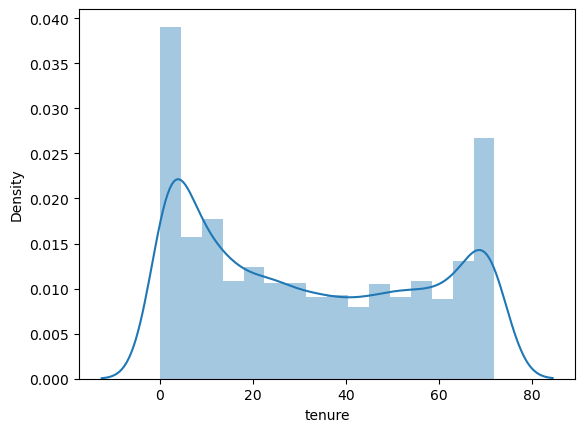

In [24]:
sns.distplot(df['tenure'])

In [25]:
def capping_outliers(col):
    q1=df['tenure'].quantile(0.25)
    q3=df['tenure'].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    if col > upper:
        return upper
    elif col < lower:
        return lower
    else:
        return col

In [26]:
df['tenure']=df['tenure'].apply(capping_outliers)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()

In [8]:
df.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
lb=LabelEncoder()

In [13]:
df['Churn']=lb.fit_transform(df['Churn'])
df.to_csv('C:/Users/Admin/Downloads/Updated.csv')

In [30]:
new_df=df.copy()

In [31]:
cats=df.select_dtypes(include=['object'])

In [32]:
for i in cats.columns:
    df[i]=lb.fit_transform(df[i])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [63]:
df.corr()['Churn']

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
Name: Churn, dtype: float64

<h3> Since we have Imbalance dataset we need to do Upsampling here </h3>

In [34]:
!pip install imblearn

In [35]:
from imblearn.combine import SMOTETomek

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=df.drop('Churn',axis=1)

In [38]:
y=df['Churn']

In [39]:
X_res,y_res=SMOTETomek().fit_resample(X,y)

In [40]:
y_res.value_counts()

0    4779
1    4779
Name: Churn, dtype: int64

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=34)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [43]:
log_reg = LogisticRegression()
gb_clf = GradientBoostingClassifier()
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
knn_clf = KNeighborsClassifier()

In [50]:
param_grid = {
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    
    'GradientBoostingClassifier':{
        'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
        'n_estimators':[50,100,150,200]
    },
    'RandomForestClassifier':{
        'criterion':['gini','entropy'],
        'n_estimators':[50,100,150,200]
    },
    'AdaboostClassifier':{
        'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
        'n_estimators':[50,100,150,200]
    },
    'KNeighborsClassifier':{
        'n_neighbors':[1,2,3,4,5,6,7]
    }
    
}


In [51]:
models = {
    'LogisticRegression': log_reg,
    'GradientBoostingClassifier':gb_clf,
    'RandomForestClassifier':rf_clf,
    'AdaboostClassifier':ada_clf,
    'KNeighborsClassifier':knn_clf
    
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Best Score: {grid_search.best_score_}")


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression Best Score: 0.8258594917787743
GradientBoostingClassifier Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
GradientBoostingClassifier Best Score: 0.8608370702541105
RandomForestClassifier Best Parameters: {'criterion': 'entropy', 'n_estimators': 100}
RandomForestClassifier Best Score: 0.8645739910313901
AdaboostClassifier Best Parameters: {'learning_rate': 0.7, 'n_estimators': 200}
AdaboostClassifier Best Score: 0.8512705530642751
KNeighborsClassifier Best Parameters: {'n_neighbors': 1}
KNeighborsClassifier Best Score: 0.8258594917787743


In [52]:
gg=GaussianNB()

In [53]:
gg.fit(X_train,y_train)

GaussianNB()

In [54]:
ypre=gg.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
print(accuracy_score(ypre,y_test))

0.8064853556485355


In [57]:
best_models

{'LogisticRegression': LogisticRegression(C=100, solver='liblinear'),
 'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.2, n_estimators=200),
 'RandomForestClassifier': RandomForestClassifier(criterion='entropy'),
 'AdaboostClassifier': AdaBoostClassifier(learning_rate=0.7, n_estimators=200),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=1)}

In [58]:
best_model=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [59]:
best_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [60]:
ypre=best_model.predict(X_test)

In [62]:
print(classification_report(ypre,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1395
           1       0.88      0.84      0.86      1473

    accuracy                           0.86      2868
   macro avg       0.86      0.86      0.86      2868
weighted avg       0.86      0.86      0.86      2868

